# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [2]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

# Conjunto de datos de ejemplo

In [3]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [4]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[07-17 11:25:34][INFO] 2025-07-17 11:25:34.896623
[07-17 11:25:35][INFO] 2025-07-17 11:25:35.645487
[07-17 11:25:35][INFO] Se ajustarán 2 parámetros.
[07-17 11:25:35][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[07-17 11:25:39][INFO] Se ajustarán 2 parámetros.
[07-17 11:25:39][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


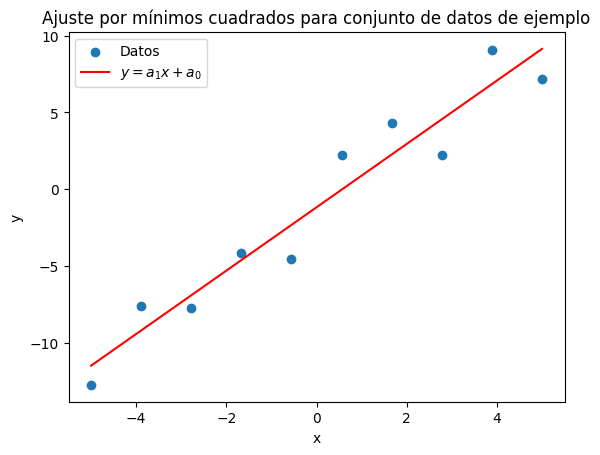

In [5]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [8]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

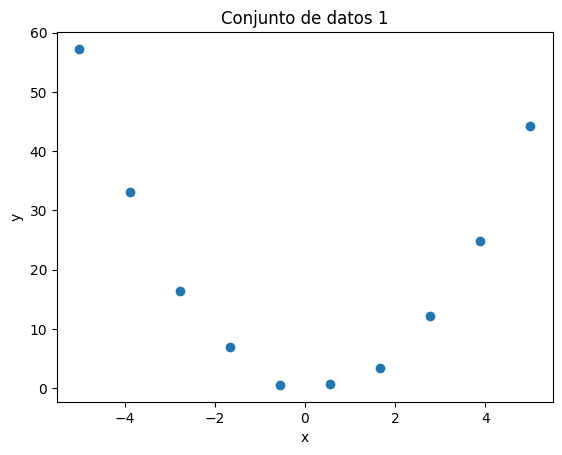

In [9]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

Interpole el conjunto de datos 1 usando la función cuadrática.

[07-17 11:28:59][INFO] Se ajustarán 3 parámetros.
[07-17 11:28:59][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[07-17 11:28:59][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


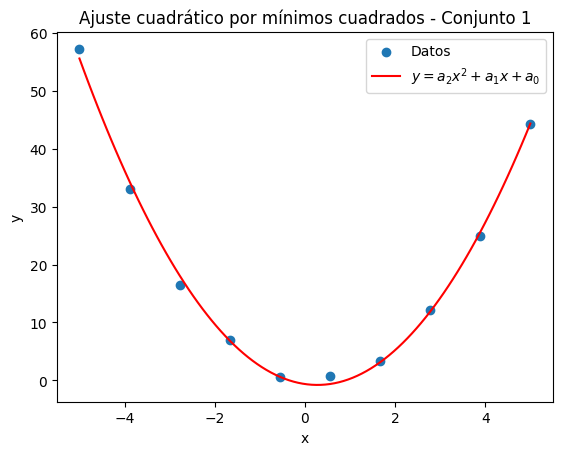

a_2 = 2.024410482925083
a_1 = -1.123325129575543
a_0 = -0.6382556172537739
y(2.25) = 7.082840911009486
y(-2.25) = 12.13780399409943


In [10]:
def der_parcial_cuad_2(xs: list, ys: list) -> tuple[float, float, float]:
    """Derivada parcial con respecto a a_2 para regresión cuadrática"""
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(yi * xi**2 for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_cuad_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Derivada parcial con respecto a a_1 para regresión cuadrática"""
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xs)
    c_ind = sum(yi * xi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_cuad_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Derivada parcial con respecto a a_0 para regresión cuadrática"""
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)

# Ajuste para el conjunto de datos 1
a_2, a_1, a_0 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_cuad_0, der_parcial_cuad_1, der_parcial_cuad_2])

# Graficar el resultado
x = np.linspace(-5, 5, 100)
y = [a_2 * xi**2 + a_1 * xi + a_0 for xi in x]

plt.scatter(xs1, ys1, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste cuadrático por mínimos cuadrados - Conjunto 1")
plt.legend()
plt.show()

print(f"a_2 = {a_2}")
print(f"a_1 = {a_1}")
print(f"a_0 = {a_0}")
print(f"y(2.25) = {a_2 * 2.25**2 + a_1 * 2.25 + a_0}")
print(f"y(-2.25) = {a_2 * (-2.25)**2 + a_1 * (-2.25) + a_0}")

## Conjunto de datos 2

In [12]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

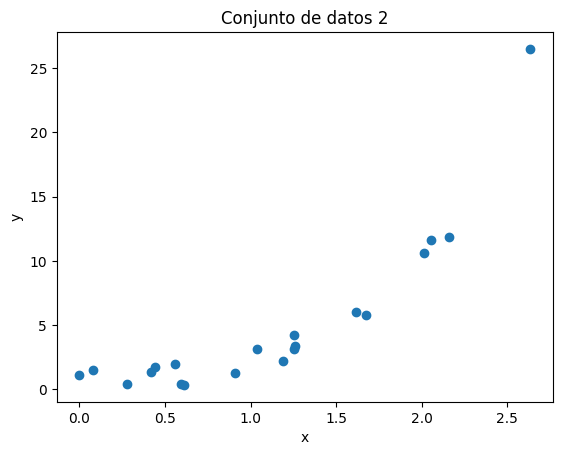

In [13]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial.

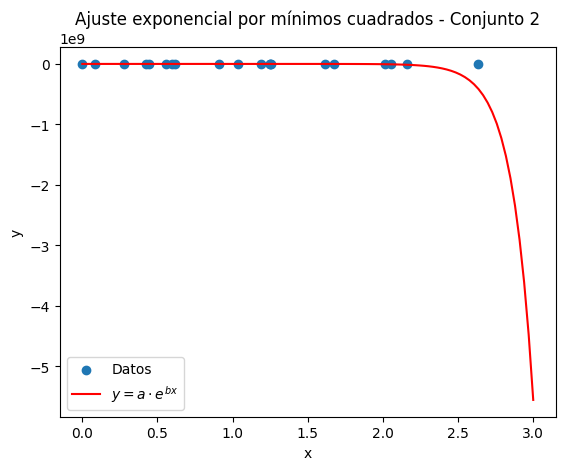

a = -2.9314644808981707
b = 7.120994084179289
y(5) = -8513866157320279.0
y(1) = -3628.21548759745


In [15]:
import math

def der_parcial_exp_a(xs: list, ys: list, a_actual: float, b_actual: float) -> tuple[float, float, float]:
    """Derivada parcial con respecto a 'a' para regresión exponencial y = a*e^(bx)"""
    c_a = sum(math.exp(2 * b_actual * xi) for xi in xs)
    c_b = sum(xi * math.exp(2 * b_actual * xi) for xi in xs)
    c_ind = sum(yi * math.exp(b_actual * xi) for xi, yi in zip(xs, ys))
    return (c_a, c_b, c_ind)

def der_parcial_exp_b(xs: list, ys: list, a_actual: float, b_actual: float) -> tuple[float, float, float]:
    """Derivada parcial con respecto a 'b' para regresión exponencial y = a*e^(bx)"""
    c_a = sum(xi * math.exp(2 * b_actual * xi) for xi in xs)
    c_b = sum(xi**2 * math.exp(2 * b_actual * xi) for xi in xs)
    c_ind = sum(yi * xi * math.exp(b_actual * xi) for xi, yi in zip(xs, ys))
    return (c_a, c_b, c_ind)

# Para ajuste exponencial, necesitas valores iniciales aproximados
# Basándome en los datos, valores iniciales razonables serían:
a_inicial = 1.0
b_inicial = 2.0

# Ajuste iterativo (simplificado - en la práctica necesitarías un método más robusto)
a, b = a_inicial, b_inicial
for _ in range(10):  # iteraciones
    try:
        # Usar las funciones de derivadas parciales con los valores actuales
        coef_a = der_parcial_exp_a(xs2, ys2, a, b)
        coef_b = der_parcial_exp_b(xs2, ys2, a, b)

        # Resolver el sistema 2x2 manualmente
        det = coef_a[0] * coef_b[1] - coef_a[1] * coef_b[0]
        if abs(det) > 1e-10:
            a = (coef_a[2] * coef_b[1] - coef_b[2] * coef_a[1]) / det
            b = (coef_a[0] * coef_b[2] - coef_b[0] * coef_a[2]) / det
    except:
        break

# Graficar el resultado
x = np.linspace(0, 3, 100)
y = [a * math.exp(b * xi) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a \cdot e^{bx} $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial por mínimos cuadrados - Conjunto 2")
plt.legend()
plt.show()

# Evaluar en los puntos solicitados
print(f"a = {a}")
print(f"b = {b}")
print(f"y(5) = {a * math.exp(b * 5)}")
print(f"y(1) = {a * math.exp(b * 1)}")